# Packages and Imports #

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re 

# Extracting , Understanding and Cleaning Data

In [169]:
df=pd.read_csv('car.csv')
df.shape[0]

848

In [170]:
df.columns

Index(['Name', 'Price', 'Used For', 'Transmisson', 'Colour', 'Make Year',
       'Mileage', 'Engine (CC)', 'Fuel', 'Kilometer Run', 'Waranty', 'Types'],
      dtype='object')

In [171]:
df.head(20)

,Name,Price,Used For,Transmisson,Colour,Make Year,Mileage,Engine (CC),Fuel,Kilometer Run,Waranty,Types
0,Hyundai | i20 Active S | TDi | 2015 | Hatchbac...,"रू. 24,75,000रू. 25,00,000",Private Use,Manual2WD,Brown,2015,14,1400,Petrol,42000,NaN,NaN
1,Excellent car on sale (Hyundai),"रू. 7,50,000",NaN,Auto2WD,Light blue,2005,11,1399,Petrol,87412,NaN,NaN
2,TATA 407 Container (Tata),"रू. 7,00,000",NaN,Manual - 2WD,White,2013,NaN,2956,Diesel,60000,NaN,NaN
3,4x4 swaraj Mazda (Mahindra),"रू. 6,00,000",NaN,Manual - 4WD,NaN,2017,NaN,NaN,Diesel,NaN,NaN,NaN
4,i20 Active good for used few time (Hyundai),रू. 375,NaN,Auto - 2WD,white,2019,17,1200,Petrol,2400,NaN,NaN
5,Tata Sumo Gold 2014 GX (Tata),"रू. 14,00,000",NaN,Manual2WD,Artic Silver,2014,12,2956cc,Diesel,NaN,NaN,NaN
6,Mega XL hatti gadi (Tata),"रू. 7,00,000",NaN,Auto2WD,Brown chocolate colour,2019,15,889,Petrol,80000,NaN,NaN
7,Maruti Suzuki Alto 2004 On Sale (Maruti Suzuki),"रू. 5,80,000",NaN,Manual - 2WD,Black,2004,NaN,800,Petrol,75000,NaN,NaN
8,Grand i10 magna 2014 (Hyundai),"रू. 18,45,000",NaN,Manual2WD,Silver,2014,NaN,1200,Petrol,31000,NaN,NaN
9,Blue colour 2016 model Baleno (Maruti Suzuki),"रू. 20,50,000",private,Auto4WD,blue,2016,17/18 km,1200,Petrol,41000,chaa.,NaN


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           848 non-null    object 
 1   Price          848 non-null    object 
 2   Used For       357 non-null    object 
 3   Transmisson    848 non-null    object 
 4   Colour         766 non-null    object 
 5   Make Year      848 non-null    object 
 6   Mileage        458 non-null    object 
 7   Engine (CC)    741 non-null    object 
 8   Fuel           848 non-null    object 
 9   Kilometer Run  706 non-null    object 
 10  Waranty        209 non-null    object 
 11  Types          0 non-null      float64
dtypes: float64(1), object(11)
memory usage: 79.6+ KB


There are several columns with missing values. Since column Types has no value and waranty has very few values, we can drop these columns.

In [173]:
df.drop(['Types','Waranty'],axis=1,inplace=True)
df.head(2)

,Name,Price,Used For,Transmisson,Colour,Make Year,Mileage,Engine (CC),Fuel,Kilometer Run
0,Hyundai | i20 Active S | TDi | 2015 | Hatchbac...,"रू. 24,75,000रू. 25,00,000",Private Use,Manual2WD,Brown,2015,14,1400,Petrol,42000
1,Excellent car on sale (Hyundai),"रू. 7,50,000",NaN,Auto2WD,Light blue,2005,11,1399,Petrol,87412


We can see that Name contains their respective company names in brackets . We can create a new column company_name from that .

In [174]:
# Extract company name from brackets (e.g., "Hyundai | i20 (Hyundai)" -> "Hyundai")
df['company_name'] = df['Name'].str.extract(r'\((.*?)\)')

# Remove the bracketed part from Name
df['Name'] = df['Name'].str.replace(r'\s*\(.*?\)\s*', '', regex=True)

# Quick check
df[['Name', 'company_name']].head(10)


,Name,company_name
0,Hyundai | i20 Active S | TDi | 2015 | Hatchback,Hyundai
1,Excellent car on sale,Hyundai
2,TATA 407 Container,Tata
3,4x4 swaraj Mazda,Mahindra
4,i20 Active good for used few time,Hyundai
5,Tata Sumo Gold 2014 GX,Tata
6,Mega XL hatti gadi,Tata
7,Maruti Suzuki Alto 2004 On Sale,Maruti Suzuki
8,Grand i10 magna 2014,Hyundai
9,Blue colour 2016 model Baleno,Maruti Suzuki


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           848 non-null    object
 1   Price          848 non-null    object
 2   Used For       357 non-null    object
 3   Transmisson    848 non-null    object
 4   Colour         766 non-null    object
 5   Make Year      848 non-null    object
 6   Mileage        458 non-null    object
 7   Engine (CC)    741 non-null    object
 8   Fuel           848 non-null    object
 9   Kilometer Run  706 non-null    object
 10  company_name   844 non-null    object
dtypes: object(11)
memory usage: 73.0+ KB


Fillins missing comapny names with mode.

In [176]:
mode_value = df['company_name'].mode()[0]
df['company_name'].fillna(mode_value, inplace=True)


Some rows in The Price Column contains multiple prices , so we average them and replace the multiple prices with single average value.

In [177]:
multiple_price_rows = df[df['Price'].str.count('रू') > 1]
multiple_price_rows

,Name,Price,Used For,Transmisson,Colour,Make Year,Mileage,Engine (CC),Fuel,Kilometer Run,company_name
0,Hyundai | i20 Active S | TDi | 2015 | Hatchback,"रू. 24,75,000रू. 25,00,000",Private Use,Manual2WD,Brown,2015,14,1400,Petrol,42000,Hyundai
704,Toyota | Fortuner | 2010 | 4WD | SUV,"रू. 57,50,000रू. 58,00,000",Private Use,Manual2WD,Black,2010,10,3000,Petrol,105000,Toyota
735,Hyundai | Venue S | 2019 | CUV,"रू. 30,50,000रू. 30,75,000",NaN,Manual2WD,Red,2019,12,1200,Petrol,40000,Hyundai
762,Suzuki | Dzire VXi | 2018 | Sedan,"रू. 24,50,000रू. 24,75,000",Private Use,Manual2WD,Silver,2018,12,1200,Petrol,44000,Maruti Suzuki
793,Suzuki | Baleno Delta | 2017 | Hatchback,"रू. 20,25,000रू. 20,50,000",Private Use,Manual2WD,Grey,2017,12,1200,Petrol,55000,Hyundai
794,Suzuki | Wagon R VXi | 2021 | Hatchback,"रू. 23,50,000रू. 23,75,000",Private Use,Manual2WD,Grey,2021,14,1200,Petrol,13000,Maruti Suzuki
802,Suzuki | Swift ZXi | 2018 | Hatchback,"रू. 26,00,000रू. 26,25,000",Private Use,Manual2WD,Grey,2018,12,1200,Petrol,35000,Maruti Suzuki


In [178]:
def clean_avg_price(text):
    nums = re.findall(r'रू\.?\s*([\d,]+)', str(text))
    nums = [int(n.replace(",", "")) for n in nums]
    return sum(nums) / len(nums) if nums else None

# Cleaned price column
new_col = df['Price'].apply(clean_avg_price)

# Insert new column at the same index
col_index = df.columns.get_loc('Price')

df.drop(columns=['Price'], inplace=True)     # remove old column
df.insert(col_index, 'Price_NRs', new_col)   # insert new column


Removing Duplicate rows

In [179]:
duplicate_rows = df[df.duplicated(keep=False)]
duplicate_rows

,Name,Price_NRs,Used For,Transmisson,Colour,Make Year,Mileage,Engine (CC),Fuel,Kilometer Run,company_name
744,Tata sumo gold urgent on the,1200000.0,NaN,PowerSteering,NaN,2009,NaN,NaN,Diesel,NaN,Tata
745,Tata sumo gold urgent on the,1200000.0,NaN,PowerSteering,NaN,2009,NaN,NaN,Diesel,NaN,Tata


In [180]:
df = df.drop_duplicates()
df.reset_index(drop=True, inplace=True)

Cleaning Transmisson column by making the values like Manual-4wd Manual 4wd same .

In [181]:
# Strip whitespace, lowercase, replace hyphens with nothing
df['Transmisson'] = df['Transmisson'].str.strip() \
                                       .str.lower() \
                                       .str.replace('-', '', regex=False) \
                                       .str.replace(' ', '', regex=False)

# Optional: check unique values
print(df['Transmisson'].unique())


['manual2wd' 'auto2wd' 'manual4wd' 'auto4wd' 'powersteering']


Used for Column contains different types of values. Some represent time the car was used , and some of them the purpose it was used for like commercial, personal , and other purposes. Because of the vast difference and uniqueness among data in Used For it would be difficult to extract any kind of useful information from it . So , we drop it.

In [182]:
df['Used For'].unique()

array(['Private Use', nan, 'private', 'personal', 'like new', '1 year',
       '1', '3 years', '-', 'Private', '5 years', 'Home', 'Prasnal', '10',
       '6 years', '12 years', 'home office', '13', '16', '32 months',
       'Supply Transportation', 'School', 'few times', 'personal use',
       '5 MONTHS', 'Persona', '14 years', 'office', '6months',
       'Office purpose', '16 months', '2', '9year', '5 year’s',
       'persional', '2 years', '6', 'personal used', 'Years', '12',
       '11 years', '1st hand drive', 'Commercial vehicle', 'companye',
       '8', 'work', '15 years', '8 years', '7 years', 'parsonal',
       'Carring goods', 'delevery', '10 years', 'Self',
       'Halka saman matra bokeko', '1.5 years', 'few years', 'privet',
       'singal hand', "7 years'", 'Personal', 'sometimes', 'personel use',
       'Chicken suppliers', '7 Years', 'Office and home', '13 years',
       'family', '13 months', 'hospital to home', '13 year', '11',
       'Valley', '20 years', '9 years', '

In [183]:
df.drop('Used For',axis=1,inplace=True)

Filling missing values in Colour Column with Unknown.  There are several misspeelled colors like silver silabar etc so we make this values consistent as much as possible.

In [184]:
from rapidfuzz import process

# List of standard colors
standard_colors = ['black', 'white', 'blue', 'red', 'silver', 'gray', 'green', 'yellow', 'orange', 'brown', 'pink']

def match_color(color):
    if pd.isna(color) or color.strip() == '':
        return 'unknown'
    match, score, _ = process.extractOne(color.lower(), standard_colors)
    return match

df['Colour'] = df['Colour'].apply(match_color)
df['Colour'] = df['Colour'].fillna('unknown')

Extracting numeric value from mileage and averaging the values that contain multiple values. Also removing empty values in the column with median since data doesnt seem to be that symmetrical and highly skewed.

<Axes: xlabel='Mileage', ylabel='Count'>

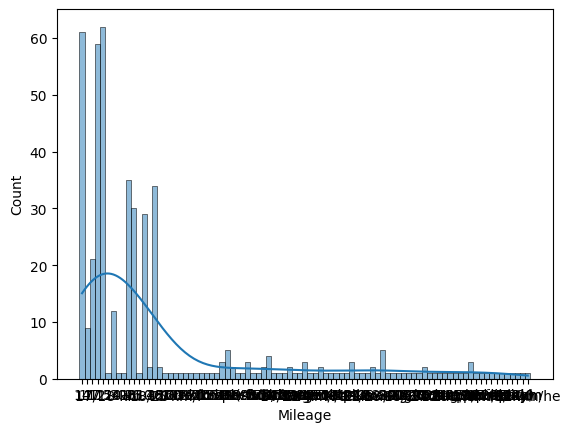

In [185]:
sns.histplot(data=df, x='Mileage', bins=30, kde=True)

In [186]:

# Remove non-numeric characters and convert to float
df['Mileage'] = df['Mileage'].astype(str).str.extract(r'(\d+\.?\d*)')[0].astype(float)


In [187]:
import re
import numpy as np

def clean_mileage(value):
    if pd.isna(value):
        return np.nan

    value = str(value)

    # Extract ALL numbers from the string
    nums = re.findall(r'\d+\.?\d*', value)

    if len(nums) == 0:
        # No numbers found ⇒ return NaN
        return np.nan
    
    nums = list(map(float, nums))

    if len(nums) == 1:
        # Only one number ⇒ return that number
        return nums[0]
    
    if len(nums) >= 2:
        # Two or more numbers ⇒ take average of first two
        return sum(nums[:2]) / 2
    

# Apply function to Mileage column
df['Mileage'] = df['Mileage'].apply(clean_mileage)


In [188]:
df[['Mileage', 'company_name']].sample(10)


,Mileage,company_name
264,14.0,Maruti Suzuki
773,9.0,Kia
792,12.0,Hyundai
530,13.0,Ford
806,NaN,Kia
690,NaN,Toyota
10,20.0,Maruti Suzuki
649,NaN,Hyundai
814,15.0,Renault
83,15.0,Skoda


In [189]:
import pandas as pd

# Step 1: Compute median
median_mileage = df['Mileage'].median()

# Step 2: Fill NaN with median
df['Mileage'].fillna(median_mileage, inplace=True)

# Step 3: Check if all values are numeric
all_numeric = pd.to_numeric(df['Mileage'], errors='coerce').notna().all()
print("All values numeric:", all_numeric)


All values numeric: True


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           847 non-null    object 
 1   Price_NRs      847 non-null    float64
 2   Transmisson    847 non-null    object 
 3   Colour         847 non-null    object 
 4   Make Year      847 non-null    object 
 5   Mileage        847 non-null    float64
 6   Engine (CC)    741 non-null    object 
 7   Fuel           847 non-null    object 
 8   Kilometer Run  706 non-null    object 
 9   company_name   847 non-null    object 
dtypes: float64(2), object(8)
memory usage: 66.3+ KB


Applying median imputaion to Kilometer Run Column as its higly skewed

<Axes: xlabel='Kilometer Run', ylabel='Count'>

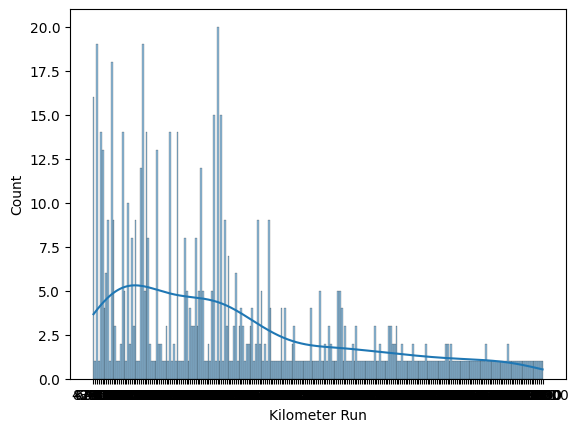

In [191]:
sns.histplot(data=df, x='Kilometer Run', bins=30, kde=True)

In [192]:
import pandas as pd

# Convert to numeric (invalid parsing becomes NaN)
df['Kilometer Run'] = pd.to_numeric(df['Kilometer Run'], errors='coerce')

# Compute median (ignoring NaN and ignoring zeros)
median_km = df.loc[df['Kilometer Run'] != 0, 'Kilometer Run'].median()

# Replace NaN with median
df['Kilometer Run'].fillna(median_km, inplace=True)

# Replace zero values with median
df.loc[df['Kilometer Run'] == 0, 'Kilometer Run'] = median_km

# Check
df['Kilometer Run']


0      42000.0
1      87412.0
2      60000.0
3      49000.0
4       2400.0
        ...   
842    26500.0
843    60000.0
844    60000.0
845    93000.0
846    60000.0
Name: Kilometer Run, Length: 847, dtype: float64

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           847 non-null    object 
 1   Price_NRs      847 non-null    float64
 2   Transmisson    847 non-null    object 
 3   Colour         847 non-null    object 
 4   Make Year      847 non-null    object 
 5   Mileage        847 non-null    float64
 6   Engine (CC)    741 non-null    object 
 7   Fuel           847 non-null    object 
 8   Kilometer Run  847 non-null    float64
 9   company_name   847 non-null    object 
dtypes: float64(3), object(7)
memory usage: 66.3+ KB


Removing all Electric and Hybrid cars data because they create confusion because of insufficient amount to derive any insights or conclusion. COnverting petrol engine to cc multiplying by 1000.

In [194]:
# Remove Electric and Hybrid cars
df = df[~df['Fuel'].isin(['Electric', 'Hybrid'])].reset_index(drop=True)

# 2. Function to extract and clean CC values
def extract_cc(val):
    val = str(val)

    # keep only digits/decimal point
    num = ''.join(ch for ch in val if ch.isdigit() or ch == '.')
    cc = pd.to_numeric(num, errors='coerce')

    # convert small numbers to proper CC
    if pd.notna(cc) and cc < 50:   # covers 0.6, 0.8, 1.2, 2.0 etc.
        cc = cc * 1000

    return cc

# 3. Apply to dataset
df['Engine (CC)'] = df['Engine (CC)'].apply(extract_cc).astype('Int64')

# 4. View result
print(df['Engine (CC)'].head())


0    1400
1    1399
2    2956
3    <NA>
4    1200
Name: Engine (CC), dtype: Int64


In [195]:
df.sample(10)

,Name,Price_NRs,Transmisson,Colour,Make Year,Mileage,Engine (CC),Fuel,Kilometer Run,company_name
368,Grand i10 Magna 2015,2050000.0,manual2wd,silver,2015,14.0,1197,Petrol,39000.0,Hyundai
101,i20 Sportz 2010 for sale,1599000.0,manual2wd,gray,2010,14.0,1197,Petrol,60500.0,Hyundai
768,Mahindra Bolero Single Cab Pickup 1.5 TPS 2018,1575000.0,manual2wd,white,2018,14.0,2523,Diesel,29594.0,Mahindra
46,Creta SX 2019 Like new,4300000.0,manual2wd,white,2019,14.0,1600,Petrol,24000.0,Hyundai
746,Nissan Terrano 2018 Brand New,3750000.0,manual2wd,silver,2018,14.0,<NA>,Petrol,5000.0,Nissan
385,omni van 8 seater 2016 single hand,850000.0,auto2wd,silver,2016,16.0,800,Petrol,34000.0,Maruti Suzuki
49,Hyundai Accent 2006 Narayani Number,550000.0,manual2wd,unknown,2006,17.0,1400,Petrol,49000.0,Hyundai
774,Made in Japan and Malaysia assembled car on sale,875000.0,manual2wd,white,2008,18.0,1000,Petrol,70000.0,Perodua
648,maruti suzuki wagner,1550000.0,manual2wd,gray,2014,20.0,1000,Petrol,48.0,Maruti Suzuki
626,FORD ECO SPORTS IN IMMACULATE CONDITION,2350000.0,powersteering,gray,2018,14.0,1500,Petrol,35500.0,Ford


Filling mising values in Enginw with median because of skewed data.

<Axes: xlabel='Engine (CC)', ylabel='Count'>

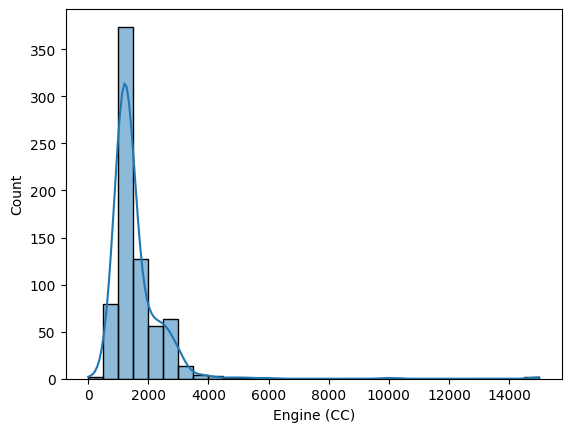

In [196]:
sns.histplot(data=df, x='Engine (CC)', bins=30, kde=True)

In [197]:
# Calculate median of Engine (CC)
cc_median = df['Engine (CC)'].median()

# Fill missing values with the median
df['Engine (CC)'] = df['Engine (CC)'].fillna(cc_median)


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           824 non-null    object 
 1   Price_NRs      824 non-null    float64
 2   Transmisson    824 non-null    object 
 3   Colour         824 non-null    object 
 4   Make Year      824 non-null    object 
 5   Mileage        824 non-null    float64
 6   Engine (CC)    824 non-null    Int64  
 7   Fuel           824 non-null    object 
 8   Kilometer Run  824 non-null    float64
 9   company_name   824 non-null    object 
dtypes: Int64(1), float64(3), object(6)
memory usage: 65.3+ KB


Ensuring there are only numbers in Make Year and filling missing values with mode.The Mode is the best simple choice because it imputes the missing data with the single most frequently observed year, respecting the structure of the bimodal distribution where missing values are most likely to belong to the largest population cluster.

<Axes: xlabel='Make Year', ylabel='Count'>

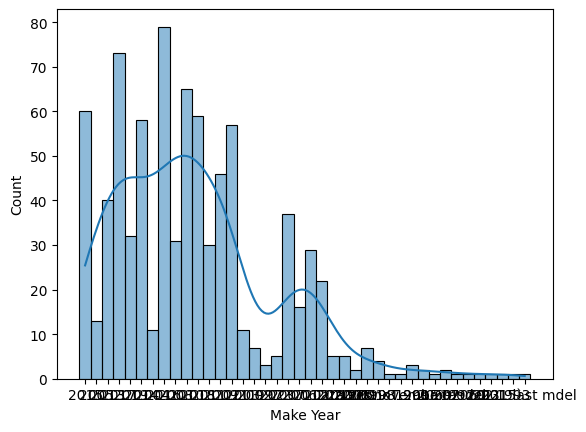

In [199]:
sns.histplot(data=df, x='Make Year', bins=30, kde=True)

In [200]:
# Check rows in Make Year that are not purely numeric
non_numeric_make_year = df[~df['Make Year'].astype(str).str.fullmatch(r'\d{4}')]

# Display those rows and the Make Year column
non_numeric_make_year[['Make Year']]


,Make Year
273,2006 november
382,Tata zest XT 2015 model
473,0
547,0
556,207
691,202
735,13
743,2015`
782,207
815,2021 last mdel


In [201]:
# Keep Make Year as string
df['Make Year'] = df['Make Year'].astype('string')

# Replace '0' with NaN
df['Make Year'] = df['Make Year'].replace('0', pd.NA)

# Extract 2–4 digit numbers from strings
import re
import pandas as pd # Ensure pd is imported if not already

def extract_valid_year(text):
    matches = re.findall(r'\d{2,4}', str(text))
    for m in matches:
        y = int(m)
        if 1950 <= y <= 2025:
            return y
    return pd.NA

df['Make Year'] = df['Make Year'].apply(extract_valid_year).astype('Int64')

# Impute missing values (original 0's or invalid) with the MODE (User Requested Change)
mode_year = df['Make Year'].mode().iloc[0]
df['Make Year'] = df['Make Year'].fillna(mode_year).astype('Int64')


converting each columns into suitable data type.

In [202]:
# String / text columns
df['Name'] = df['Name'].astype('string')
df['Engine (CC)'] = df['Engine (CC)'].astype('int64')

# Numeric columns
df['Price_NRs'] = df['Price_NRs'].astype('int64')
df['Kilometer Run'] = df['Kilometer Run'].astype('int64')
df['Mileage'] = df['Mileage'].astype('float64')


# Convert to categorical
cat_cols = ['Colour', 'Fuel', 'company_name', 'Transmisson']
for col in cat_cols:
    df[col] = df[col].astype('category')

df.dtypes


Name             string[python]
Price_NRs                 int64
Transmisson            category
Colour                 category
Make Year                 Int64
Mileage                 float64
Engine (CC)               int64
Fuel                   category
Kilometer Run             int64
company_name           category
dtype: object

In [203]:
df.sample(10)

,Name,Price_NRs,Transmisson,Colour,Make Year,Mileage,Engine (CC),Fuel,Kilometer Run,company_name
424,TATA 1109,2799000,manual2wd,white,2018,14.0,3700,Diesel,90000,Tata
509,urgent sale 9841395832,750000,manual2wd,unknown,2015,14.0,2600,Diesel,9,Mahindra
437,Renault duster RXS 2018,2500000,manual2wd,unknown,2018,14.0,1500,Petrol,50000,Renault
570,Ecosport 2013 trend model,1775000,manual2wd,white,2013,14.0,1200,Diesel,54500,Ford
95,car swift ZXI,2300000,auto2wd,gray,2016,14.0,1200,Petrol,25000,Maruti Suzuki
180,swift vxi 2012 mode is for sale,1675000,manual2wd,silver,2012,14.0,1200,Petrol,52000,Maruti Suzuki
196,Airport Pick-up & Drop,1500000,manual2wd,unknown,2015,14.0,1100,Petrol,49000,Maruti Suzuki
611,Hyundai i10,2400000,manual2wd,silver,2020,2025.0,1200,Petrol,26500,Hyundai
215,Hyundai Creta 2022 model,4800000,manual2wd,white,2022,14.0,1200,Diesel,49000,Hyundai
328,Hundai tucson 2009 on sell,2100000,manual4wd,silver,2009,12.0,2000,Diesel,90000,Hyundai


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Name           824 non-null    string  
 1   Price_NRs      824 non-null    int64   
 2   Transmisson    824 non-null    category
 3   Colour         824 non-null    category
 4   Make Year      824 non-null    Int64   
 5   Mileage        824 non-null    float64 
 6   Engine (CC)    824 non-null    int64   
 7   Fuel           824 non-null    category
 8   Kilometer Run  824 non-null    int64   
 9   company_name   824 non-null    category
dtypes: Int64(1), category(4), float64(1), int64(3), string(1)
memory usage: 45.9 KB


In [205]:
df['Engine (CC)'].sample

<bound method NDFrame.sample of 0      1400
1      1399
2      2956
3      1200
4      1200
       ... 
819    1200
820    1200
821    1200
822    1200
823    2200
Name: Engine (CC), Length: 824, dtype: int64>

In [206]:
numeric_cols = ['Price_NRs', 'Make Year', 'Mileage', 'Kilometer Run','Engine (CC)']

for col in numeric_cols:
    # Check which rows cannot be converted to numeric
    invalid = df[~df[col].apply(lambda x: pd.api.types.is_number(x))]
    if not invalid.empty:
        print(f"Invalid values in {col}:")
        print(invalid[[col]])
    else:
        print(f"All values in {col} match numeric type.")


All values in Price_NRs match numeric type.
All values in Make Year match numeric type.
All values in Mileage match numeric type.
All values in Kilometer Run match numeric type.
All values in Engine (CC) match numeric type.


In [207]:
cat_cols = ['Colour', 'Fuel', 'company_name', 'Transmisson']

for col in cat_cols:
    if df[col].dtype.name != 'category':
        print(f"{col} is not categorical.")
    else:
        print(f"All values in {col} are categorical type.")


All values in Colour are categorical type.
All values in Fuel are categorical type.
All values in company_name are categorical type.
All values in Transmisson are categorical type.


In [208]:
str_cols = ['Name']

for col in str_cols:
    if df[col].dtype.name != 'string':
        print(f"{col} is not string type.")
    else:
        # Optional: check if all values are indeed str
        invalid_str = df[~df[col].apply(lambda x: isinstance(x, str))]
        if not invalid_str.empty:
            print(f"Invalid values in {col}:")
            print(invalid_str)
        else:
            print(f"All values in {col} are strings.")


All values in Name are strings.


In [209]:
df.describe()

,Price_NRs,Make Year,Mileage,Engine (CC),Kilometer Run
count,8.240000e+02,824.0,824.000000,824.000000,8.240000e+02
mean,2.280126e+06,2013.200243,186.411044,1519.893204,5.836044e+04
std,2.160000e+06,5.67058,3014.784513,960.519550,9.365929e+04
min,3.750000e+02,1975.0,5.000000,0.000000,9.000000e+00
25%,1.161250e+06,2010.0,14.000000,1198.000000,3.800000e+04
50%,1.750000e+06,2014.0,14.000000,1200.000000,4.900000e+04
75%,2.575000e+06,2017.0,15.000000,1600.000000,6.300000e+04
max,2.400000e+07,2023.0,69000.000000,15000.000000,1.700000e+06


In [210]:
import pandas as pd

def count_outliers(df):
    outlier_counts = {}

    # Select only numeric columns
    numeric_cols = df.select_dtypes(include='number').columns

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers
        count = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()

        outlier_counts[col] = count

    return pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count'])

# Run on your dataset
outlier_table = count_outliers(df)
print(outlier_table)


               Outlier Count
Price_NRs                 61
Make Year                 14
Mileage                  225
Engine (CC)              103
Kilometer Run             43


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Name           824 non-null    string  
 1   Price_NRs      824 non-null    int64   
 2   Transmisson    824 non-null    category
 3   Colour         824 non-null    category
 4   Make Year      824 non-null    Int64   
 5   Mileage        824 non-null    float64 
 6   Engine (CC)    824 non-null    int64   
 7   Fuel           824 non-null    category
 8   Kilometer Run  824 non-null    int64   
 9   company_name   824 non-null    category
dtypes: Int64(1), category(4), float64(1), int64(3), string(1)
memory usage: 45.9 KB


## Graphical Analysis ##

<Axes: xlabel='Price_NRs', ylabel='Count'>

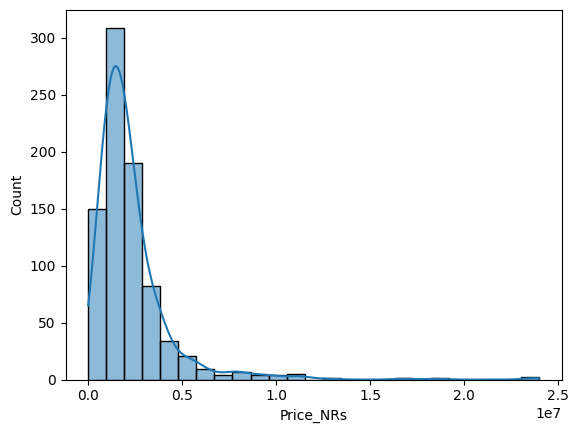

In [212]:
sns.histplot(df['Price_NRs'], bins=25, kde=True)


<Axes: xlabel='Price_NRs'>

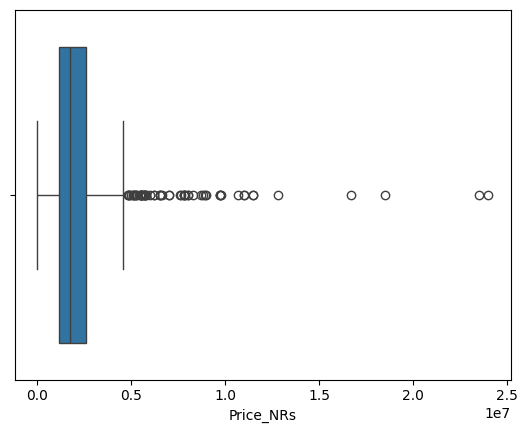

In [213]:
sns.boxplot(x=df['Price_NRs'])


From above graphs, the insights are  :                                                                                                                                                                                               1.1.Most cars are cheap
2.Very few are very expensive
3.Price distribution is not normal
4.The plot has right skew
5.Use median, not mean, for imputation or summary

<Axes: xlabel='Make Year', ylabel='Count'>

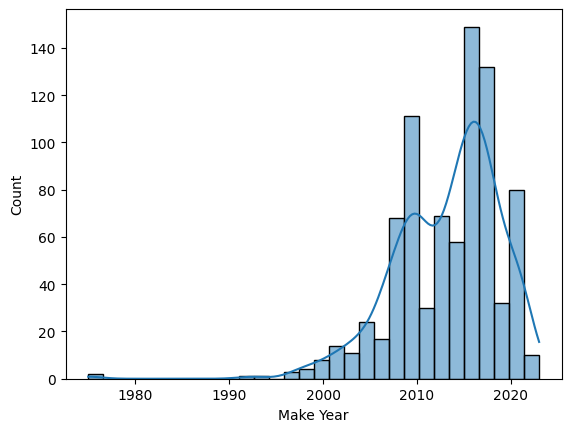

In [214]:
sns.histplot(df['Make Year'], bins=30, kde=True)


<Axes: xlabel='Make Year'>

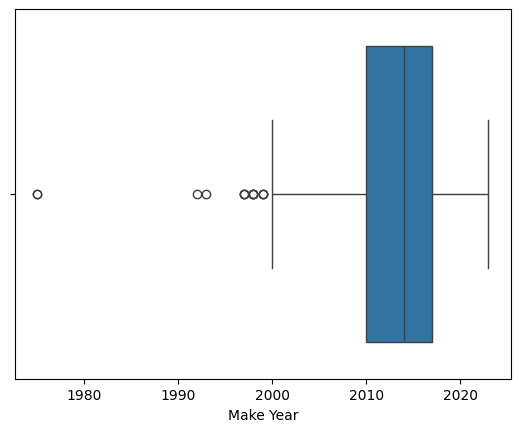

In [215]:
sns.boxplot(x=df['Make Year'])

For Make Year, above graph give following insights:
1.Most cars are from 2008–2020
2.Peak around 2015–2018
3.Very few old cars (before 1995)
4.Distribution is slightly left-skewed
5.Data is realistic and high quality

<Axes: xlabel='Mileage', ylabel='Count'>

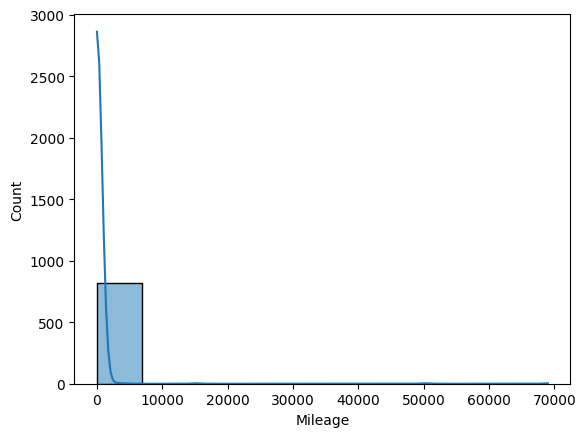

In [216]:
sns.histplot(df['Mileage'], bins=10, kde=True)


<Axes: xlabel='Mileage'>

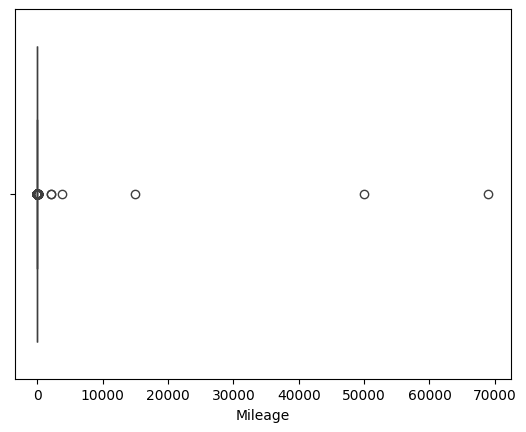

In [217]:
sns.boxplot(x=df['Mileage'])

Above graph shows that most cars have mileage between 10-20 km/l. There are some outliers with very high mileage that make absolutely no sense . 

In [218]:
# Compute Q1, Q3, and IQR
Q1 = df['Mileage'].quantile(0.25)
Q3 = df['Mileage'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
# Note: Given the low IQR for Mileage (likely 0), these bounds will be very tight.
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 🚨 CHANGE: Cap the values instead of removing rows
# Values above the upper_bound are set to the upper_bound
# Values below the lower_bound are set to the lower_bound
df['Mileage'] = df['Mileage'].clip(lower=lower_bound, upper=upper_bound)

# Check
print(df['Mileage'].describe())

count    824.000000
mean      14.228519
std        1.182682
min       12.500000
25%       14.000000
50%       14.000000
75%       15.000000
max       16.500000
Name: Mileage, dtype: float64


<Axes: xlabel='Mileage', ylabel='Count'>

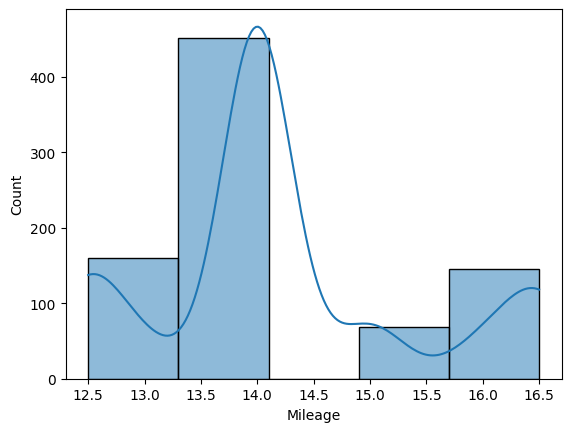

In [219]:
sns.histplot(df['Mileage'], bins=5, kde=True)


<Axes: xlabel='Mileage'>

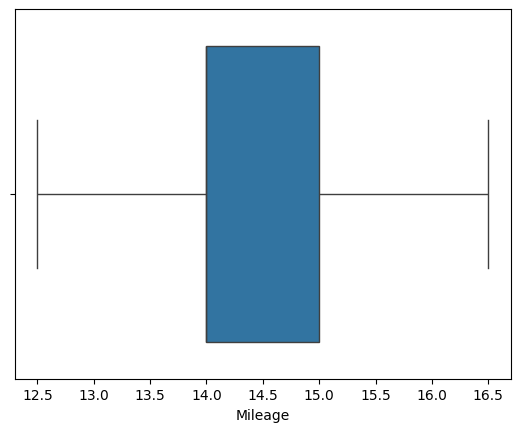

In [220]:
sns.boxplot(x=df['Mileage'])

The current graphs show that the 'Mileage' column is now clean of extreme outliers but is dominated by a single value (the mode is 14.0). The data is multimodal and exhibits very low variability, meaning most cars share one of a few common mileage ratings.

<Axes: xlabel='Kilometer Run', ylabel='Count'>

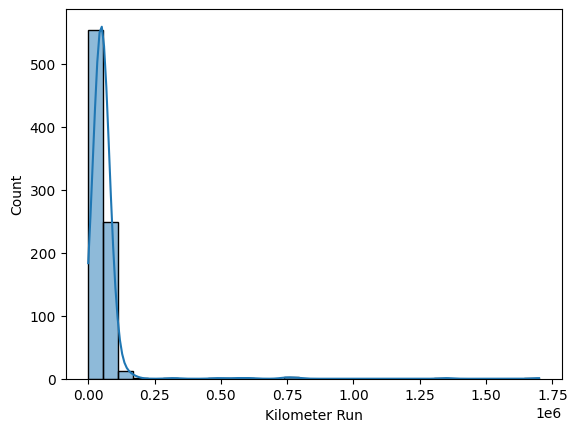

In [221]:
sns.histplot(df['Kilometer Run'].dropna(), bins=30, kde=True)

<Axes: xlabel='Kilometer Run'>

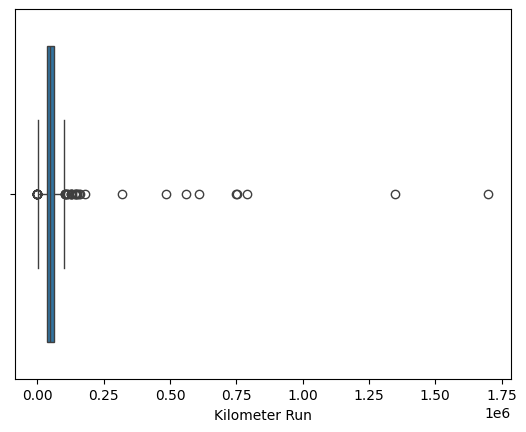

In [222]:
sns.boxplot(x=df['Kilometer Run'])

Most of the cars have only run under 10000 km except some that have execedded even 70000 km.

For Engine (CC) we capped the outliers at 600 CC and 6000 CC since most cars fall below this value. This approach helps retain more data points while mitigating the influence of extreme values on analyses.

In [223]:
# 1️⃣ Convert to numeric (if not done already)
df['Engine (CC)'] = pd.to_numeric(df['Engine (CC)'], errors='coerce')


# --- Outlier Capping using IQR ---

# 3️⃣ Calculate Q1, Q3, and IQR
Q1 = df['Engine (CC)'].quantile(0.25)
Q3 = df['Engine (CC)'].quantile(0.75)
IQR = Q3 - Q1

# 4️⃣ Define the Outlier Bounds (1.5 * IQR Rule)
# Lower bound: anything below Q1 - 1.5 * IQR
# Upper bound: anything above Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 5️⃣ Cap the Outliers
# Values above the upper_bound are set to the upper_bound
df['Engine (CC)'] = df['Engine (CC)'].clip(upper=upper_bound)

# Values below the lower_bound are set to the lower_bound
df['Engine (CC)'] = df['Engine (CC)'].clip(lower=lower_bound)

# 6️⃣ Verify (Check the new min and max against the calculated bounds)
print(df['Engine (CC)'].describe())


count     824.000000
mean     1401.814320
std       421.387402
min       595.000000
25%      1198.000000
50%      1200.000000
75%      1600.000000
max      2203.000000
Name: Engine (CC), dtype: float64


In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Name           824 non-null    string  
 1   Price_NRs      824 non-null    int64   
 2   Transmisson    824 non-null    category
 3   Colour         824 non-null    category
 4   Make Year      824 non-null    Int64   
 5   Mileage        824 non-null    float64 
 6   Engine (CC)    824 non-null    int64   
 7   Fuel           824 non-null    category
 8   Kilometer Run  824 non-null    int64   
 9   company_name   824 non-null    category
dtypes: Int64(1), category(4), float64(1), int64(3), string(1)
memory usage: 45.9 KB


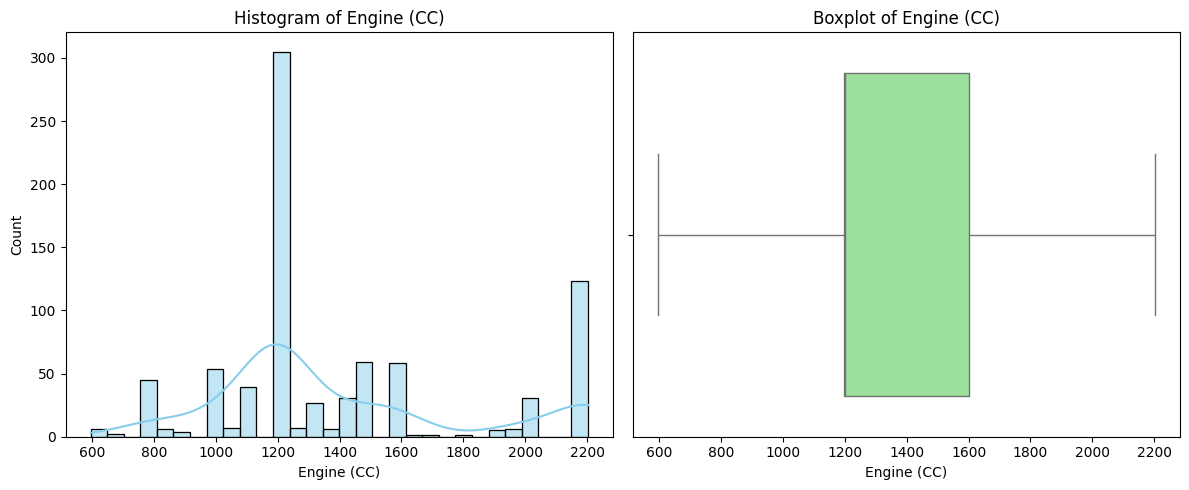

In [225]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))

# Histogram of Engine (CC)
plt.subplot(1,2,1)
sns.histplot(df['Engine (CC)'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Histogram of Engine (CC)')
plt.xlabel('Engine (CC)')

# Boxplot of Engine (CC)
plt.subplot(1,2,2)
sns.boxplot(x=df['Engine (CC)'].dropna(), color='lightgreen')
plt.title('Boxplot of Engine (CC)')
plt.xlabel('Engine (CC)')

plt.tight_layout()
plt.show()


The most common engine size is 1200 CC; the majority of vehicles fall between 1200CC and $1600 CC.The capping successfully removed the extreme high-CC outliers, bringing the maximum value down to approximately 2200 CCor the calculated upper bound.The distribution is multimodal, indicating a mix of engine types common in the market, with 1200CC being the preferred choice.

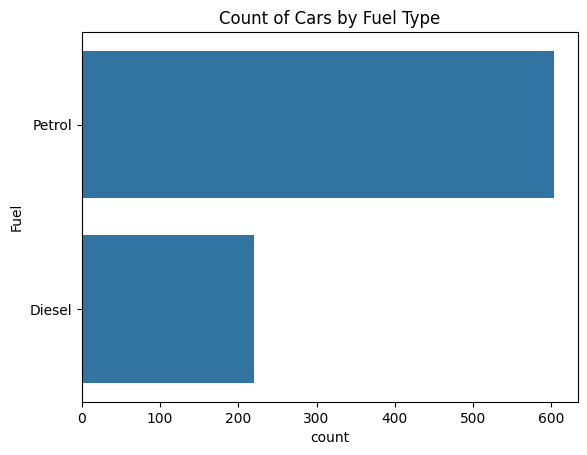

In [226]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(y=df['Fuel'], order=df['Fuel'].value_counts().index)
plt.title('Count of Cars by Fuel Type')
plt.show()


Petrol cars are far more in numbers than Diesel cars.

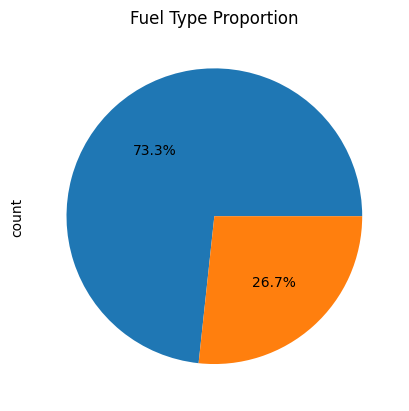

In [227]:
df['Fuel'].value_counts().plot.pie(autopct='%1.1f%%', labels=None)
plt.title('Fuel Type Proportion')
plt.show()


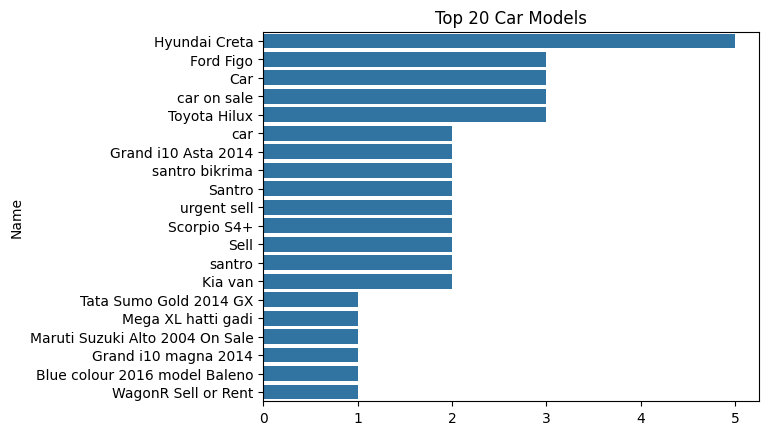

In [228]:
top_names = df['Name'].value_counts().head(20)
sns.barplot(y=top_names.index, x=top_names.values)
plt.title('Top 20 Car Models')
plt.show()


THese are some of the frequent names placed to be sold.

C:\Users\Acer\AppData\Local\Temp\ipykernel_26248\1494472202.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data_to_plot.values, y=data_to_plot.index, palette='pastel')


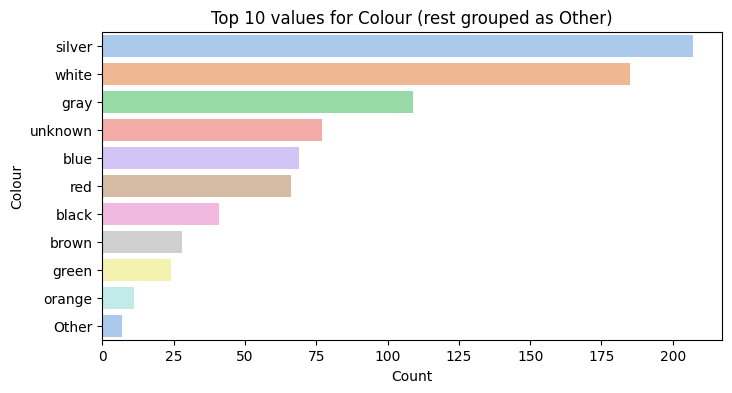

In [229]:
# Function to prepare top N + others (redefined for context)
def top_n_categories(series, n=10):
    counts = series.value_counts()
    top = counts.nlargest(n)
    other_count = counts.iloc[n:].sum()
    top['Other'] = other_count
    return top

# Plotting for 'Colour'
top_n = 10
data_to_plot = top_n_categories(df['Colour'], n=top_n)

plt.figure(figsize=(8,4))
sns.barplot(x=data_to_plot.values, y=data_to_plot.index, palette='pastel')
plt.title(f'Top {top_n} values for Colour (rest grouped as Other)')
plt.xlabel('Count')
plt.ylabel('Colour')
plt.show()


Silver, White , Gray are most frequent colored cars.

C:\Users\Acer\AppData\Local\Temp\ipykernel_26248\1802646524.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data_to_plot.values, y=data_to_plot.index, palette='pastel')


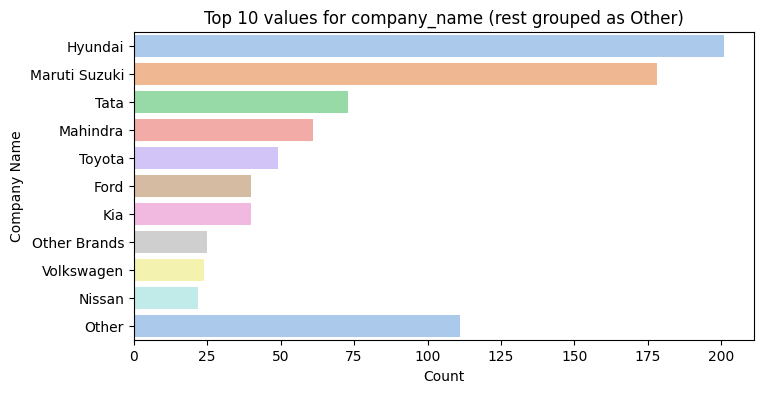

In [230]:
# Function to prepare top N + others (redefined for context)
def top_n_categories(series, n=10):
    counts = series.value_counts()
    top = counts.nlargest(n)
    other_count = counts.iloc[n:].sum()
    top['Other'] = other_count
    return top

# Plotting for 'company_name'
top_n = 10
data_to_plot = top_n_categories(df['company_name'], n=top_n)

plt.figure(figsize=(8,4))
sns.barplot(x=data_to_plot.values, y=data_to_plot.index, palette='pastel')
plt.title(f'Top {top_n} values for company_name (rest grouped as Other)')
plt.xlabel('Count')
plt.ylabel('Company Name')
plt.show()

Most frequent car companies placed to be sold are Hyundai, Maruti Suzuki,Tata, Mahindra and so on.

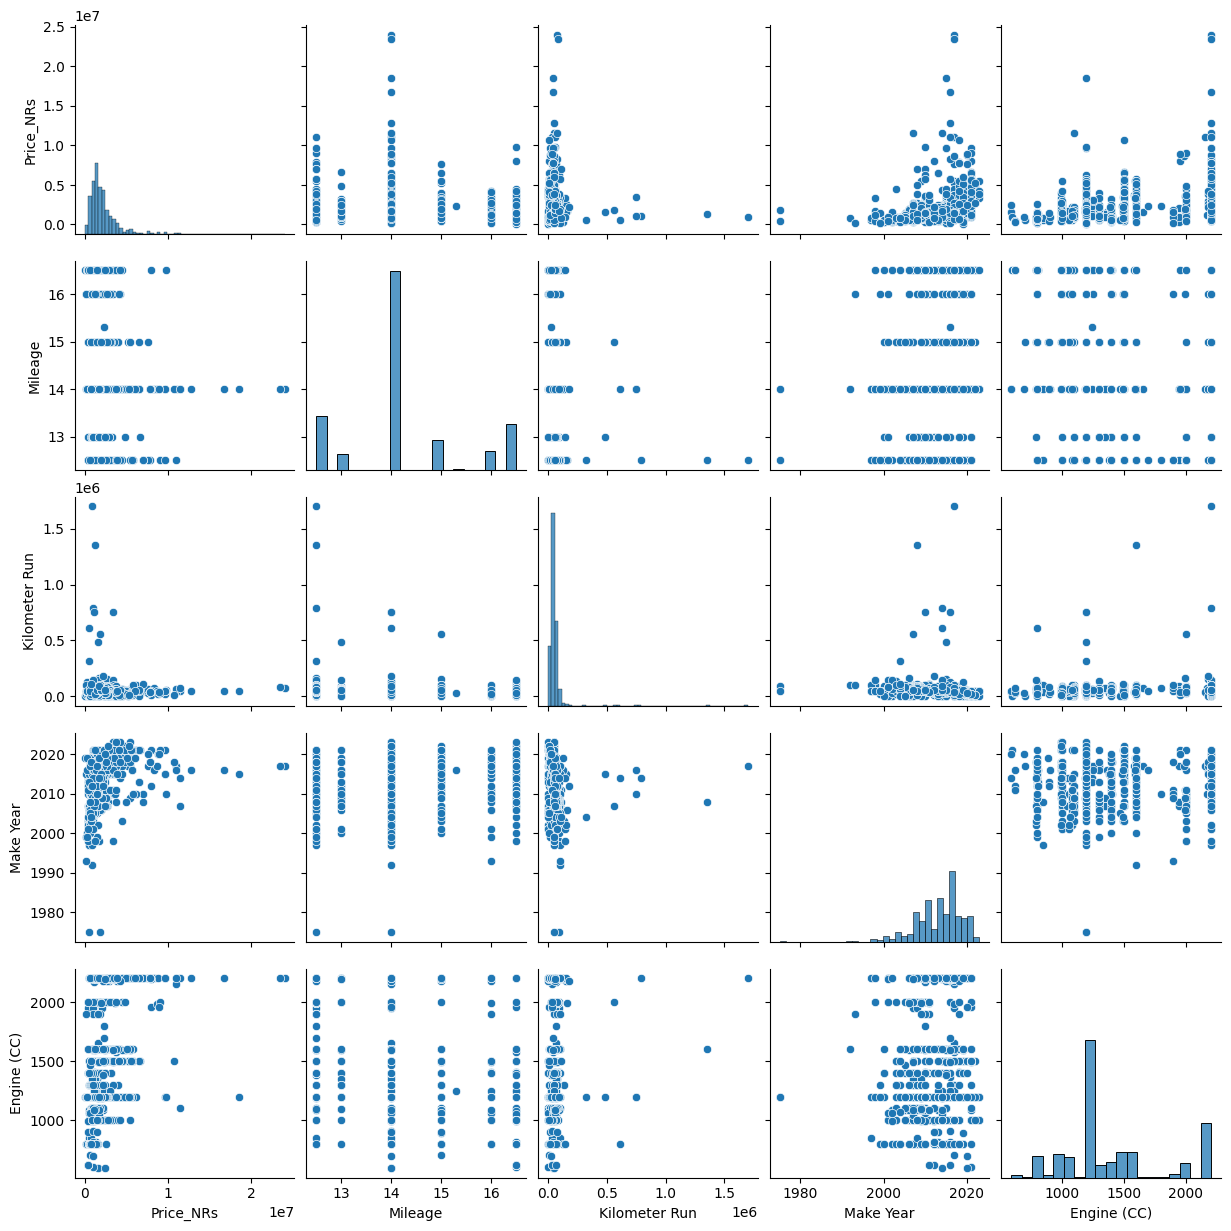

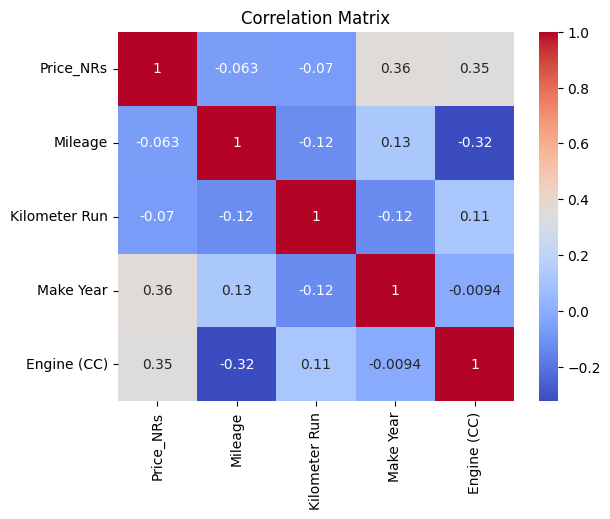

In [231]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['Price_NRs', 'Mileage', 'Kilometer Run', 'Make Year','Engine (CC)']

# Scatter plots
sns.pairplot(df[num_cols])
plt.show()

# Correlation matrix
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


C:\Users\Acer\AppData\Local\Temp\ipykernel_26248\1956252172.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data_to_plot.values, y=data_to_plot.index, palette='pastel')


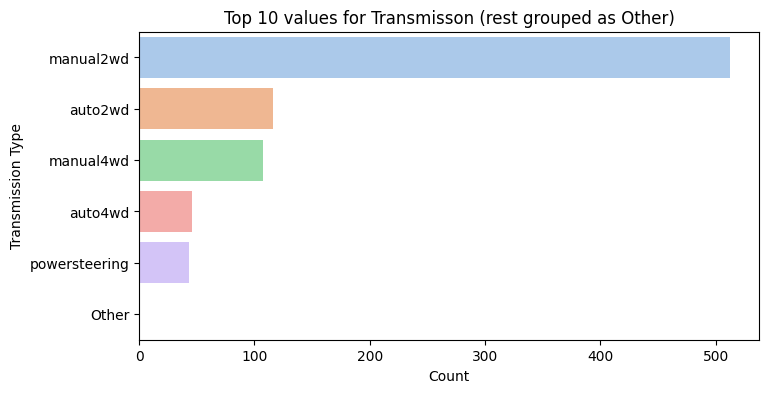

In [232]:
# Function to prepare top N + others (redefined for context)
def top_n_categories(series, n=10):
    counts = series.value_counts()
    top = counts.nlargest(n)
    other_count = counts.iloc[n:].sum()
    top['Other'] = other_count
    return top

# Plotting for 'Transmisson'
top_n = 10
data_to_plot = top_n_categories(df['Transmisson'], n=top_n)

plt.figure(figsize=(8,4))
# Note: Since 'Transmisson' likely has fewer than 10 categories, 'Other' may be small or zero.
sns.barplot(x=data_to_plot.values, y=data_to_plot.index, palette='pastel')
plt.title(f'Top {top_n} values for Transmisson (rest grouped as Other)')
plt.xlabel('Count')
plt.ylabel('Transmission Type')
plt.show()

The transmission plot shows that 'manual2wd' is the most popular transmission type by a large margin, dominating the market share in this dataset. The other common choices are 'auto2wd' and 'manual4wd', showing a clear preference for two-wheel-drive systems. Specialized or less common types, such as 'powersteering' and 'auto4wd', are present but represent a very small portion of the overall vehicle count.

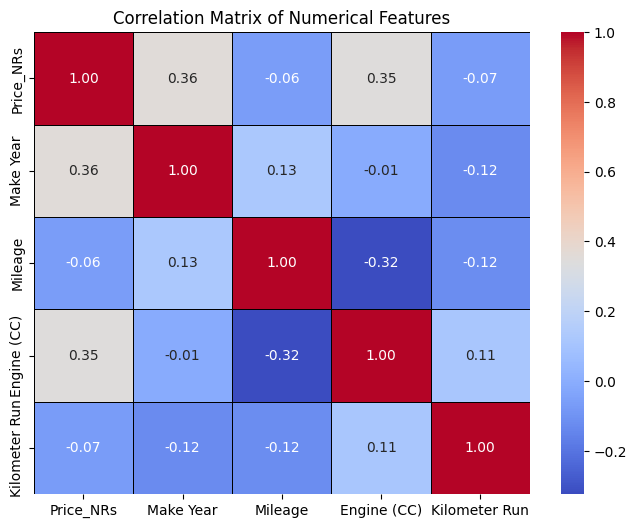

In [233]:
# 1. Calculate the Pearson Correlation Matrix
correlation_matrix = df[['Price_NRs', 'Make Year', 'Mileage', 'Engine (CC)', 'Kilometer Run']].corr()

# 2. Plot the Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix, 
    annot=True,              # Show the correlation values on the map
    cmap='coolwarm',         # Color map
    fmt=".2f",               # Format to 2 decimal places
    linewidths=.5,           # Add lines between cells
    linecolor='black'
)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

The correlation matrix shows that the Make Year ($0.36$) and Engine (CC) ($0.35$) are the best positive predictors of Price. Surprisingly, Kilometer Run and Mileage have a very weak negative correlation with Price ($-0.07$ and $-0.06$), suggesting their impact is masked by other factors. There is low risk of multicollinearity as most feature-to-feature correlations are weak.

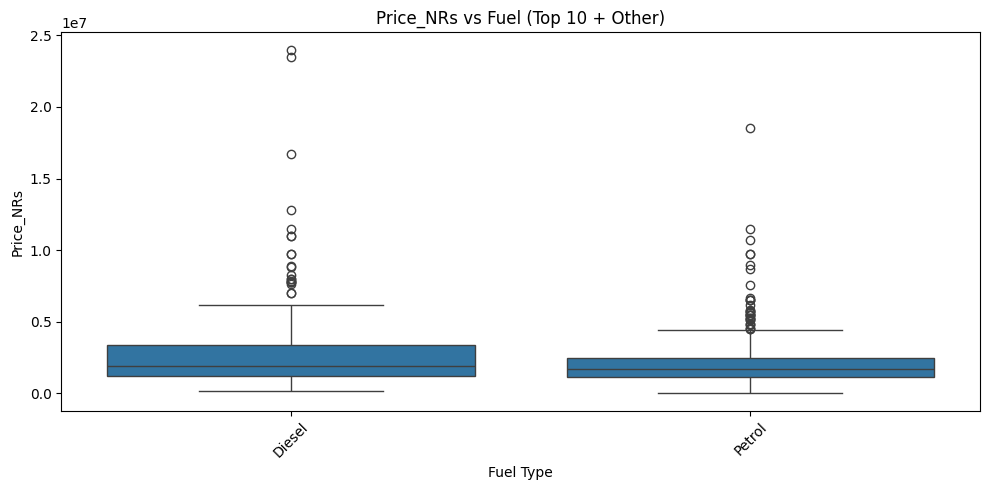

In [234]:
# Number of top categories to show
top_n = 10

# Get value counts and top categories
counts = df['Fuel'].value_counts()
top_categories = counts.nlargest(top_n).index

# Replace less frequent categories with 'Other'
df_plot = df.copy()
df_plot['Fuel'] = df_plot['Fuel'].apply(lambda x: x if x in top_categories else 'Other')

# Plot
plt.figure(figsize=(10,5))
sns.boxplot(x=df_plot['Fuel'], y=df_plot['Price_NRs'])
plt.title(f'Price_NRs vs Fuel (Top {top_n} + Other)')
plt.xticks(rotation=45)
plt.xlabel('Fuel Type')
plt.ylabel('Price_NRs')
plt.tight_layout()
plt.show()


The median price for Diesel and Petrol cars is nearly identical, indicating no major average price advantage for either fuel type. However, Diesel vehicles show a slightly greater spread of prices and appear to command the highest maximum prices (outliers).

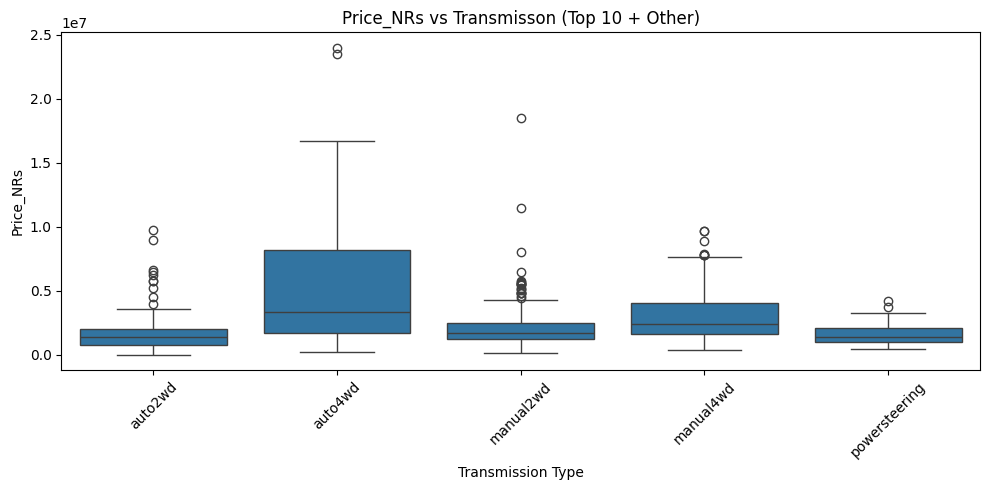

In [235]:
# Number of top categories to show
top_n = 10

# Get value counts and top categories
counts = df['Transmisson'].value_counts()
top_categories = counts.nlargest(top_n).index

# Replace less frequent categories with 'Other'
df_plot = df.copy()
df_plot['Transmisson'] = df_plot['Transmisson'].apply(lambda x: x if x in top_categories else 'Other')

# Plot
plt.figure(figsize=(10,5))
sns.boxplot(x=df_plot['Transmisson'], y=df_plot['Price_NRs'])
plt.title(f'Price_NRs vs Transmisson (Top {top_n} + Other)')
plt.xticks(rotation=45)
plt.xlabel('Transmission Type')
plt.ylabel('Price_NRs')
plt.tight_layout()
plt.show()

'auto4wd' is the most expensive transmission type, boasting the highest median price and the largest price spread (variability).

The common configurations, 'manual2wd' and 'auto2wd', have the lowest and most similar median prices, making them the budget-friendly options.

The 'powersteering' category is associated with the lowest overall median price, suggesting it groups older or less expensive vehicles.

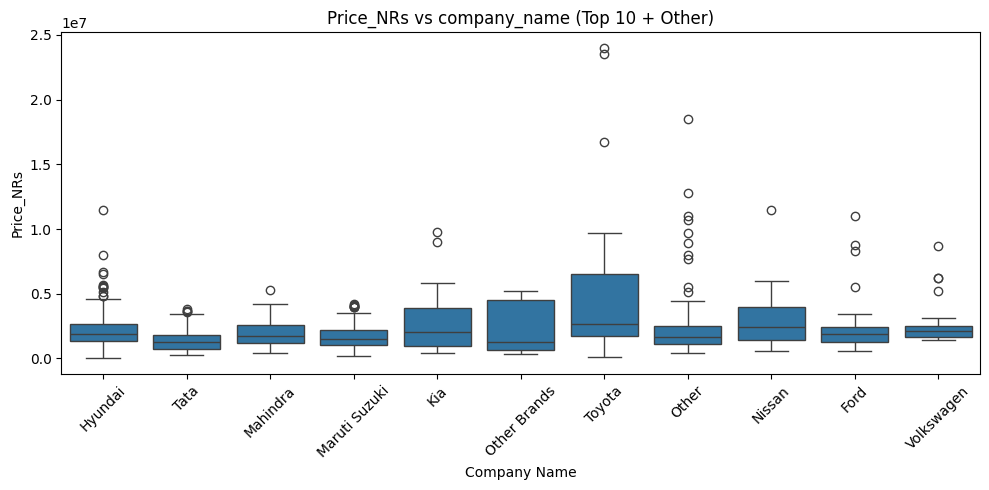

In [236]:
# Number of top categories to show
top_n = 10

# Get value counts and top categories
counts = df['company_name'].value_counts()
top_categories = counts.nlargest(top_n).index

# Replace less frequent categories with 'Other'
df_plot = df.copy()
df_plot['company_name'] = df_plot['company_name'].apply(lambda x: x if x in top_categories else 'Other')

# Plot
plt.figure(figsize=(10,5))
sns.boxplot(x=df_plot['company_name'], y=df_plot['Price_NRs'])
plt.title(f'Price_NRs vs company_name (Top {top_n} + Other)')
plt.xticks(rotation=45)
plt.xlabel('Company Name')
plt.ylabel('Price_NRs')
plt.tight_layout()
plt.show()

Toyota Commands the Highest Median: The Toyota brand has the highest median price (the line inside the box), indicating its vehicles are typically priced higher than all other top brands.

High-End Market Leaders: Toyota and the "Other" category (representing diverse low-volume luxury/niche brands) show the largest price spreads and the highest extreme outliers, commanding the top end of the market.

Mass Market Consistency: Dominant brands like Hyundai, Tata, and Maruti Suzuki cluster at the lower median price range, reflecting their status as high-volume, affordable manufacturers.

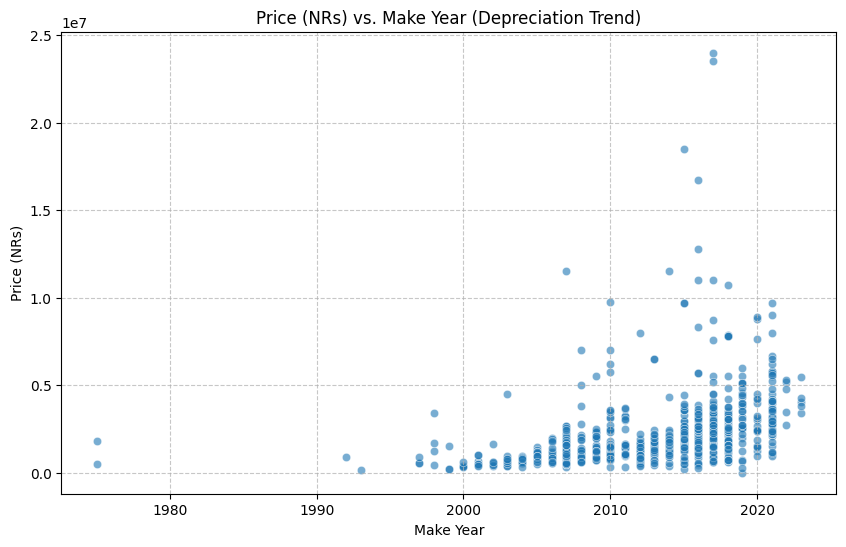

In [237]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Make Year', y='Price_NRs', data=df, alpha=0.6)
plt.title('Price (NRs) vs. Make Year (Depreciation Trend)')
plt.xlabel('Make Year')
plt.ylabel('Price (NRs)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

The price of cars drops exponentially as they get older, confirming a non-linear depreciation trend. Cars made before 2005 have minimal price variation, while vehicles made after 2015 show the highest prices and the widest range, dominating the premium market.

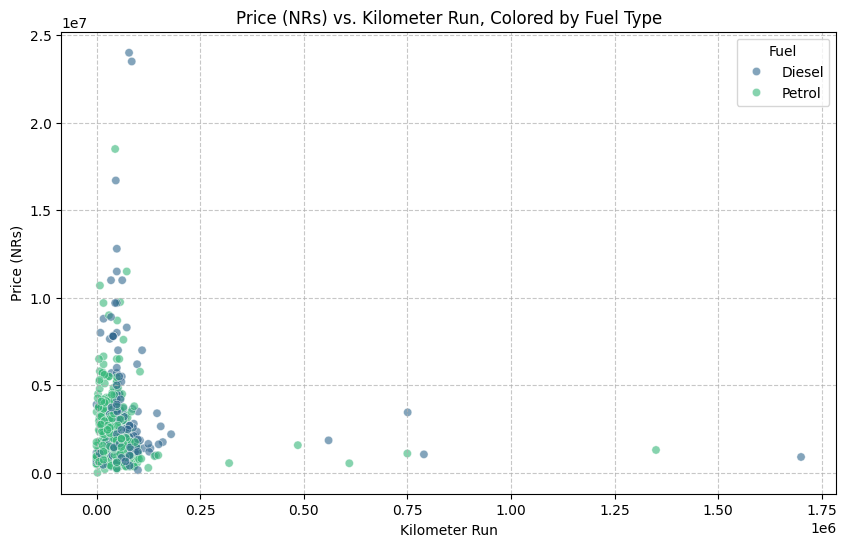

In [238]:
plt.figure(figsize=(10, 6))
# Use 'Fuel' as a hue to see if the depreciation rate differs between Petrol and Diesel.
sns.scatterplot(x='Kilometer Run', y='Price_NRs', hue='Fuel', data=df, alpha=0.6, palette='viridis')
plt.title('Price (NRs) vs. Kilometer Run, Colored by Fuel Type')
plt.xlabel('Kilometer Run')
plt.ylabel('Price (NRs)')
plt.legend(title='Fuel')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Price decay is sharp only within the first $\sim 250,000$ kilometers, after which prices cluster near the floor. Diesel cars achieve the highest overall prices in the dataset, but the rate of depreciation across Kilometer Run is similar for both Diesel and Petrol types.

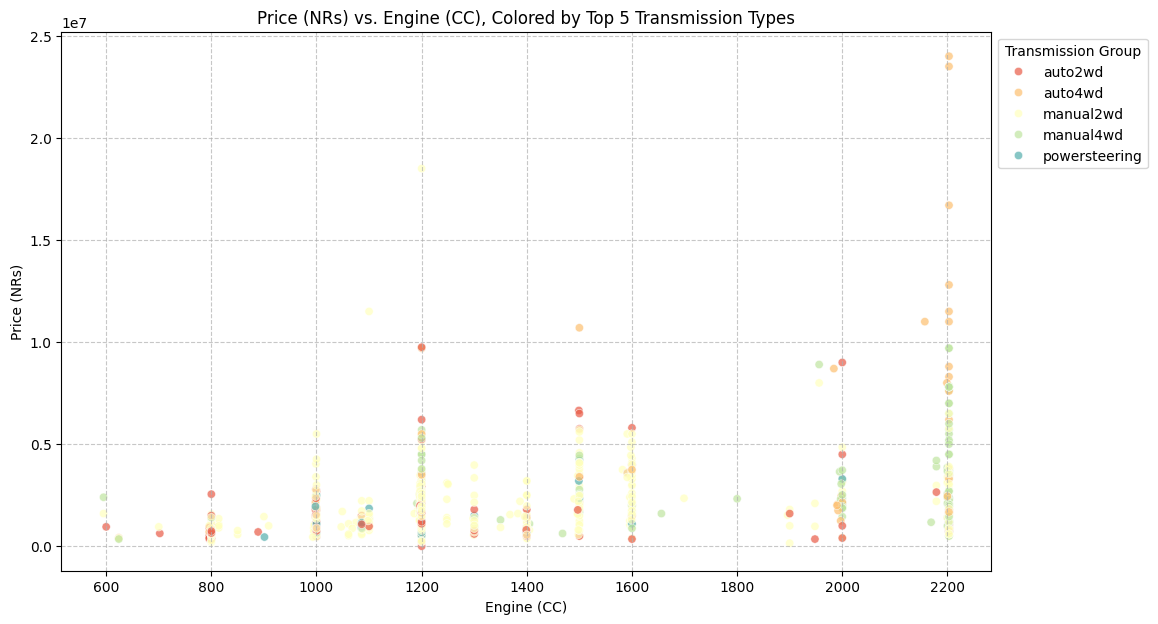

In [239]:
# Function to prepare top N + others (redefined for context)
def top_n_categories(series, n=10):
    counts = series.value_counts()
    top = counts.nlargest(n)
    other_count = counts.iloc[n:].sum()
    top['Other'] = other_count
    return top

# Prepare a copy of the transmission column for plotting
top_n = 5 # Using 5 for better clarity in scatter plot hue
df_plot = df.copy()
top_transmissions = df['Transmisson'].value_counts().nlargest(top_n).index
df_plot['Transmisson_Grouped'] = df_plot['Transmisson'].apply(
    lambda x: x if x in top_transmissions else 'Other_Trans'
)

plt.figure(figsize=(12, 7))
sns.scatterplot(
    x='Engine (CC)',
    y='Price_NRs',
    hue='Transmisson_Grouped',
    data=df_plot,
    alpha=0.7,
    palette='Spectral'
)
plt.title(f'Price (NRs) vs. Engine (CC), Colored by Top {top_n} Transmission Types')
plt.xlabel('Engine (CC)')
plt.ylabel('Price (NRs)')
plt.legend(title='Transmission Group', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

The most expensive vehicles (highest prices) are heavily dominated by the auto4wd transmission type across the entire range of engine sizes. While most cars cluster at the low end of the price spectrum, price variance drastically increases for engines larger than $2000\text{ CC}$, where high-end vehicles from all transmission groups are concentrated. Manual2wd and auto2wd are consistently associated with the lowest prices regardless of engine size.

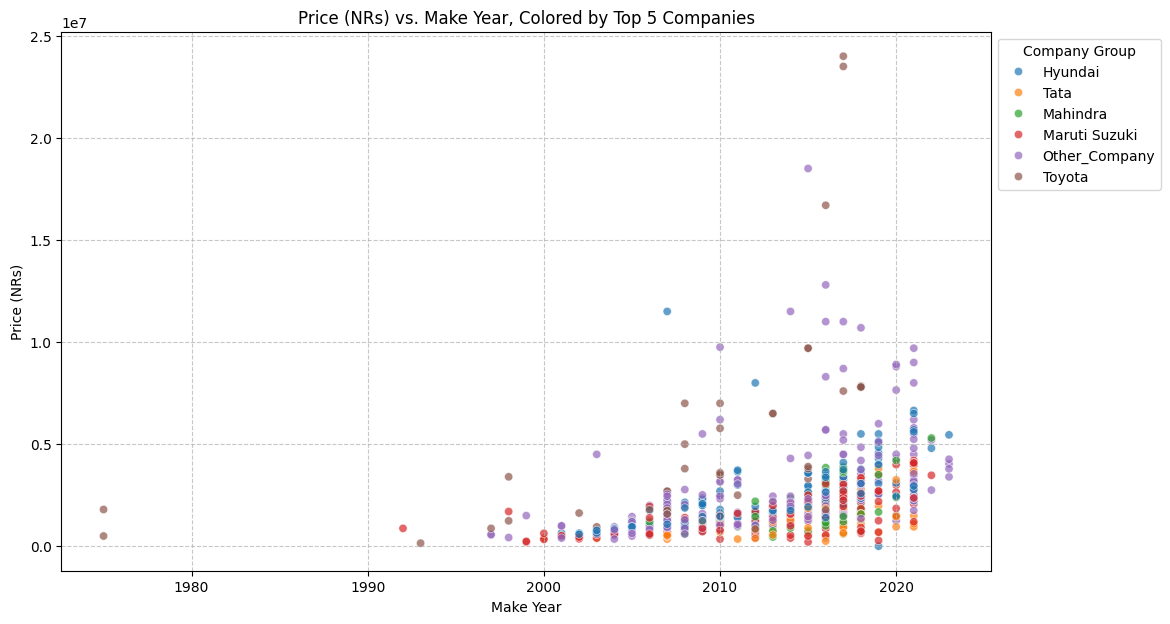

In [240]:
# Function to prepare top N + others (redefined for context)
def top_n_categories(series, n=10):
    counts = series.value_counts()
    top = counts.nlargest(n)
    other_count = counts.iloc[n:].sum()
    top['Other'] = other_count
    return top

# Prepare a copy of the company_name column for plotting
top_n = 5 # Using 5 for better clarity in scatter plot hue
df_plot = df.copy()
top_companies = df['company_name'].value_counts().nlargest(top_n).index
df_plot['Company_Grouped'] = df_plot['company_name'].apply(
    lambda x: x if x in top_companies else 'Other_Company'
)

plt.figure(figsize=(12, 7))
sns.scatterplot(
    x='Make Year',
    y='Price_NRs',
    hue='Company_Grouped',
    data=df_plot,
    alpha=0.7,
    palette='tab10'
)
plt.title(f'Price (NRs) vs. Make Year, Colored by Top {top_n} Companies')
plt.xlabel('Make Year')
plt.ylabel('Price (NRs)')
plt.legend(title='Company Group', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

The key finding is that Toyota consistently demonstrates superior value retention, maintaining a higher price floor and ceiling across nearly all 'Make Years' compared to other major brands. Conversely, high-volume, mass-market manufacturers like Hyundai, Tata, and Maruti Suzuki cluster tightly at the lower price spectrum, rarely exceeding the median price range, which confirms they follow a much steeper depreciation curve. Meanwhile, the "Other_Company" group, representing niche and luxury brands, drives the extremes of the market, showing both the lowest residual values for older cars and some of the highest price outliers for newer models.

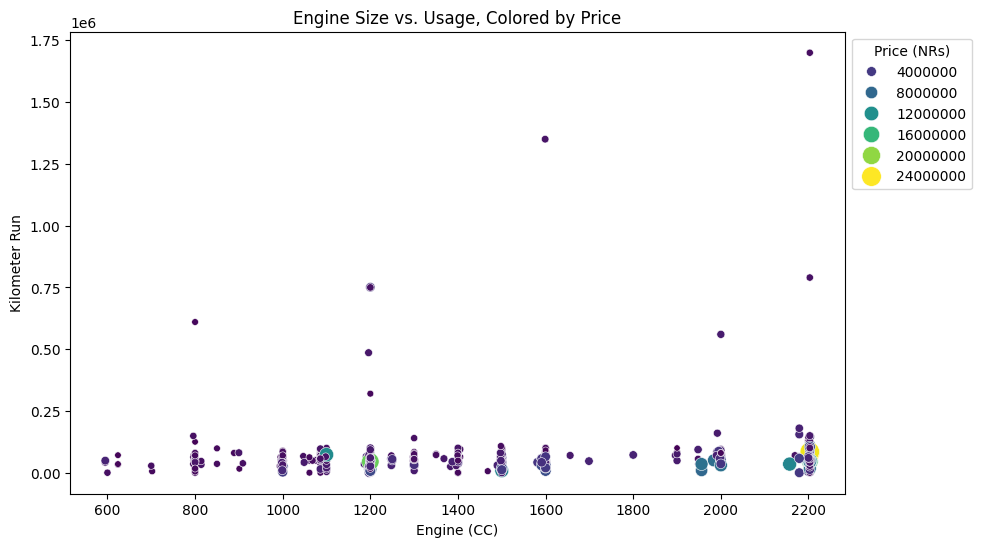

In [241]:
plt.figure(figsize=(10, 6))
# Create a continuous color map (cmap) based on Price_NRs
sns.scatterplot(
    x='Engine (CC)', 
    y='Kilometer Run', 
    hue='Price_NRs', 
    data=df, 
    size='Price_NRs', # Use size to further emphasize high-priced points
    palette='viridis', 
    sizes=(20, 200)
)
plt.title('Engine Size vs. Usage, Colored by Price')
plt.xlabel('Engine (CC)')
plt.ylabel('Kilometer Run')
plt.legend(title='Price (NRs)', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

The scatter plot shows that the highest price potential is achieved by cars with low kilometer run (usage), confirming usage is the primary short-term price limiter. The market's most valuable segments are concentrated around engine sizes of $1200\text{ CC}$ and $2200\text{ CC}$, which command the largest high-priced dots. For the vast majority of the engine range ($600\text{ CC}$ to $2000\text{ CC}$), the engine size itself does not guarantee a high price, as high-priced cars are scattered, indicating that factors like age and brand are more influential.

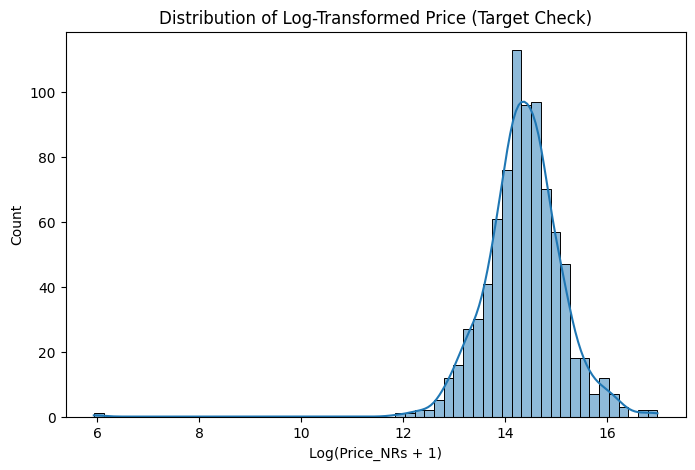

In [242]:
# Assuming you apply a Log Transformation to Price_NRs (using np.log1p)
import numpy as np
df_plot['Log_Price_NRs'] = np.log1p(df['Price_NRs'])

plt.figure(figsize=(8, 5))
sns.histplot(df_plot['Log_Price_NRs'], kde=True)
plt.title('Distribution of Log-Transformed Price (Target Check)')
plt.xlabel('Log(Price_NRs + 1)')
plt.show()

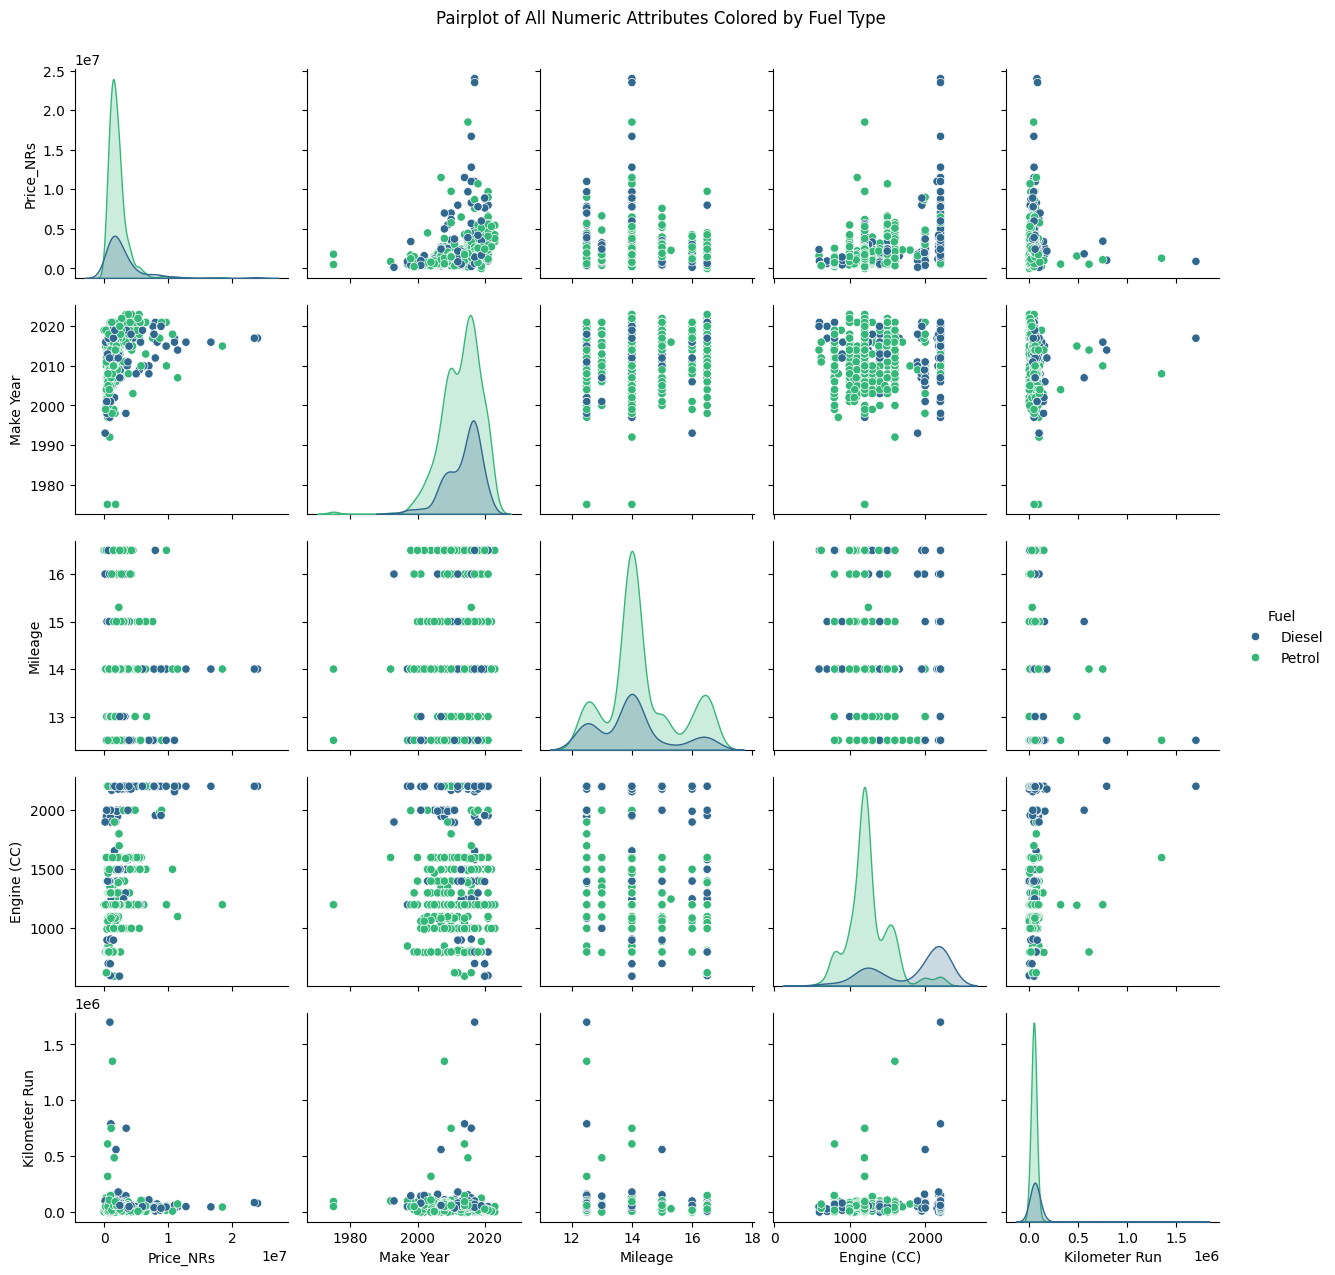

In [243]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Columns to include
numeric_cols = ['Price_NRs', 'Make Year', 'Mileage', 'Engine (CC)', 'Kilometer Run']

# Generate the Pairplot
sns.pairplot(df[numeric_cols + ['Fuel']], hue='Fuel', diag_kind='kde', palette='viridis')
plt.suptitle('Pairplot of All Numeric Attributes Colored by Fuel Type', y=1.02)
plt.show()

The final Pairplot confirms that the Make Year is the strongest positive predictor of Price, with Engine (CC) also showing a clear correlation, while Kilometer Run is only weakly related. The distributions show that Mileage and Engine (CC) are multimodal, which is a structural feature of the data, and that Diesel cars are associated with the larger Engine (CC) segment, while Petrol cars dominate the smaller engine class. The low degree of correlation between the independent variables is ideal for training a linear model.

In [244]:
import pandas as pd

# Select numeric columns
numeric_cols = df.select_dtypes(include='number')

# Function to count outliers and check zeros
def outliers_and_zeros(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Boolean mask of outliers
    outlier_mask = (column < lower_bound) | (column > upper_bound)

    # Count outliers
    outlier_count = outlier_mask.sum()

    # Count zeros among outliers
    zeros_in_outliers = ((column == 0) & outlier_mask).sum()

    return pd.Series([outlier_count, zeros_in_outliers], index=['Outlier Count', 'Zeros in Outliers'])

# Apply to all numeric columns
outlier_summary = numeric_cols.apply(outliers_and_zeros)
print(outlier_summary)


                   Price_NRs  Make Year  Mileage  Engine (CC)  Kilometer Run
Outlier Count             61         14        0            0             43
Zeros in Outliers          0          0        0            0              0


What Drives Car Price:

Age Matters Most: The biggest factor that makes a car expensive or cheap is its age (or Make Year). 
Prices drop very quickly for older cars.

Brand Holds Value: The Toyota brand holds its value much better than popular brands like Hyundai or Maruti Suzuki, selling for higher prices even when the cars are the same age.

Top Segments: The most expensive cars are those with large engines and auto4wd (automatic 4-wheel drive) transmissions.

Usage is Secondary: The number of kilometers a car has run mainly matters for cars with very low mileage under 250,000 km. After that, almost all cars are worth the same low price.    

How the Data Looks:

The data is ready for a prediction model because the target variable (Price) was transformed to be more spread out like a normal bell curve.

The most common transmission is manual2wd.

Diesel cars are generally the ones with the larger engines, showing a clear split in the market.

How to Use This Information: 

Automatic Pricing Tool: The main use is building a tool that can instantly guess the fair price of any used car.

Smart Buying: Dealers should focus on getting Toyota vehicles because they hold their value better, and avoid buying many high-mileage cars, as they are hard to price.

Loan Decisions: Banks can use the age-based price drops to figure out how much a car will be worth in the future, helping them set better loan amounts.

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Name           824 non-null    string  
 1   Price_NRs      824 non-null    int64   
 2   Transmisson    824 non-null    category
 3   Colour         824 non-null    category
 4   Make Year      824 non-null    Int64   
 5   Mileage        824 non-null    float64 
 6   Engine (CC)    824 non-null    int64   
 7   Fuel           824 non-null    category
 8   Kilometer Run  824 non-null    int64   
 9   company_name   824 non-null    category
dtypes: Int64(1), category(4), float64(1), int64(3), string(1)
memory usage: 45.9 KB


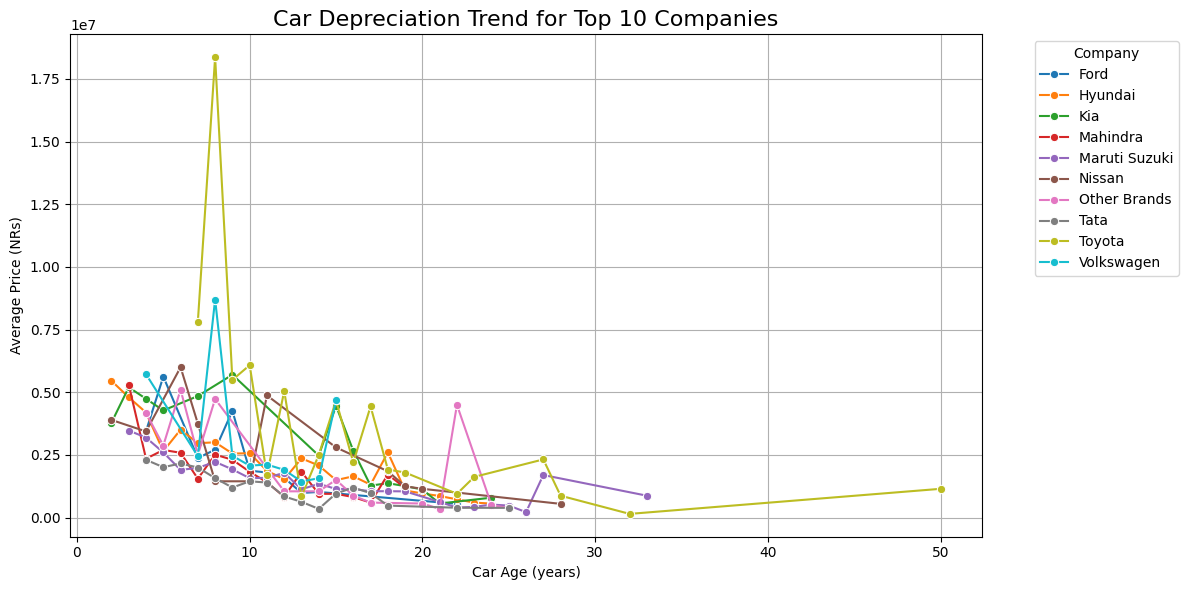

In [246]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# Feature Engineering
# -----------------------------
current_year = 2025
df['CarAge'] = current_year - df['Make Year']

# Clean company names (remove extra spaces and unify capitalization)
df['company_name'] = df['company_name'].str.strip().str.title()

# -----------------------------
# Select Top 10 companies by count
# -----------------------------
top_companies = df['company_name'].value_counts().nlargest(10).index
df_top = df[df['company_name'].isin(top_companies)]

# -----------------------------
# Compute average price per CarAge for each company
# -----------------------------
avg_price_trend = (
    df_top.groupby(['company_name', 'CarAge'])['Price_NRs']
    .mean()
    .reset_index()
)

# -----------------------------
# Plot depreciation trend
# -----------------------------
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=avg_price_trend,
    x='CarAge',
    y='Price_NRs',
    hue='company_name',
    marker='o'
)
plt.title('Car Depreciation Trend for Top 10 Companies', fontsize=16)
plt.xlabel('Car Age (years)')
plt.ylabel('Average Price (NRs)')
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
